### **Estudo Librosa**


### **- Spectrogram decomposition**


### 1. `decompose(S, *[, n_components, transformer, ...])`

A função `decompose` é utilizada para decompor uma matriz de características (como um espectrograma) em seus componentes. Essa técnica é útil em muitas aplicações de processamento de áudio, como na separação de fontes sonoras, redução de ruído ou mesmo na análise musical.

- **Parâmetros:**
  - `S`: A matriz de entrada que você deseja decompor. Geralmente, é um espectrograma ou alguma representação de frequência de tempo do sinal.
  - `n_components`: O número de componentes desejados para a decomposição. Por exemplo, em uma análise PCA (Principal Component Analysis), isso equivaleria ao número de principais componentes que você gostaria de manter.
  - `transformer`: Uma instância de aprendizado de máquina ou uma função de transformação que realiza a decomposição. Você pode usar decompositores pré-definidos como PCA, NMF (Non-negative Matrix Factorization), ou até mesmo criar seu próprio.

Esta função retorna os componentes decompostos do sinal original, o que permite uma análise mais detalhada dos aspectos individuais do sinal.

### 2. `hpss(S, *[, kernel_size, power, mask, margin])`

HPSS, ou separação harmônica e percussiva, é uma técnica que divide o sinal em suas componentes harmônicas (notas, melodias) e percussivas (batidas, ritmos). Esta função é particularmente útil para análises musicais e de batida, onde separar esses elementos pode ser crucial.

- **Parâmetros:**
  - `S`: A matriz de espectrograma (geralmente o módulo da STFT) do sinal de áudio.
  - `kernel_size`: O tamanho do filtro de mediana usado para separar as componentes. Valores maiores podem resultar em uma separação mais limpa entre harmônicos e percussivos.
  - `power`: Eleva o espectrograma até a potência especificada antes de aplicar a separação, o que pode influenciar a eficácia da separação.
  - `mask`: Se ativo, a função retorna máscaras booleanas que podem ser aplicadas ao espectrograma original para isolar os componentes harmônicos e percussivos em vez das componentes separadas em si.
  - `margin`: Margens para aumentar a separação entre as componentes harmônicas e percussivas. Um valor mais alto aumenta a diferença entre os dois, potencialmente levando a uma separação mais clara.

### 3. `nn_filter(S, *[, rec, aggregate, axis])`

Esta função aplica um filtro baseado na agregação de vizinhos mais próximos a uma matriz de espectrograma. Pode ser usada para suavizar um espectrograma, realçar padrões ou reduzir ruído.

- **Parâmetros:**
  - `S`: A matriz de espectrograma a ser filtrada.
  - `rec`: Determina se a filtragem deve ser recursiva, o que pode resultar em uma suavização mais pronunciada.
  - `aggregate`: A função de agregação a ser usada (por exemplo, média, mediana).
  - `axis`: Axis ao longo do qual a agregação é feita, o que determina se a filtragem ocorre no tempo ou na frequência.

Estas ferramentas de decomposição e filtragem do Librosa são poderosas para análise avançada de áudio, permitindo manipular e entender melhor os componentes constituintes de sinais de áudio complexos. Se precisar de mais detalhes ou exemplos de código sobre como empregar essas funções em seu projeto, por favor, informe!

### 1. Decompõe (`decompose`) uma Matriz de Características

Vamos começar decompondo um espectrograma do sinal de áudio em componentes usando NMF (Non-negative Matrix Factorization):

In [15]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Carregando um arquivo de áudio
filename = 'teste.mp3'
audio, sr = librosa.load(filename)

# Obtendo o espectrograma
S = np.abs(librosa.stft(audio))

# Usando NMF para decompor o espectrograma em 2 componentes
components, activation = librosa.decompose.decompose(S, n_components=2)

print(f"activation shape: {activation.shape}")
print(f"components shape: {components.shape}")

activation shape: (2, 7348)
components shape: (1025, 2)


In [16]:
activation = activation.reshape((components.shape[1], activation.shape[1]))

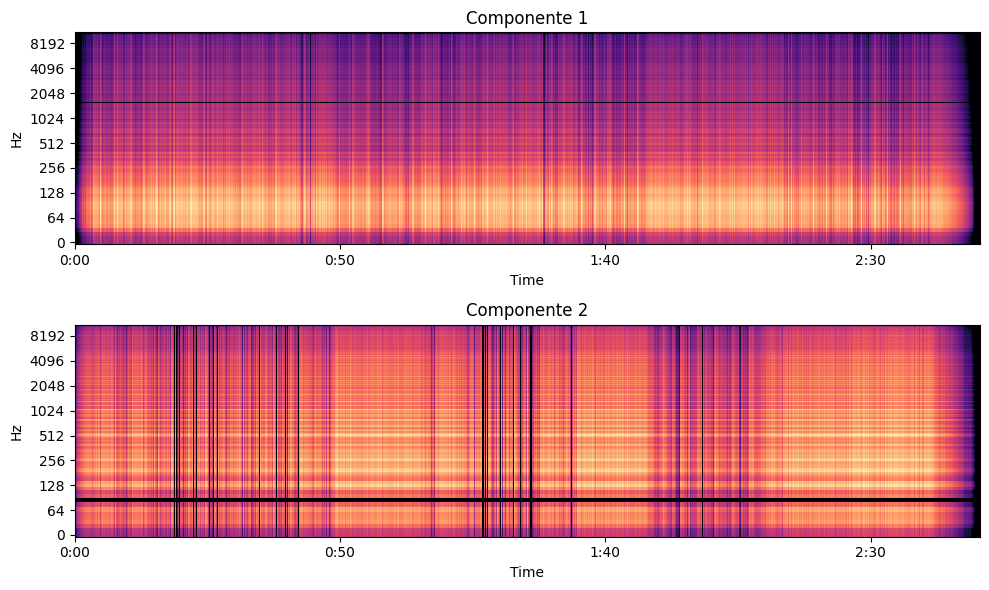

In [19]:
# Visualizando os componentes
plt.figure(figsize=(10, 6))
for i, component in enumerate(components.T, 0):
    plt.subplot(2, 1, i+1)
    db_component = librosa.amplitude_to_db(component[:, np.newaxis] * activation[i, :], ref=np.max)
    librosa.display.specshow(db_component, y_axis='log', x_axis='time', sr=sr)
    plt.title(f'Componente {i+1}')
plt.tight_layout()
plt.show()

Neste exemplo, carregamos um arquivo de áudio, extraímos seu espectrograma via STFT (Transformada de Fourier de Tempo Curto), e utilizamos a NMF para decompor o espectrograma em dois componentes. Cada componente representa partes diferentes do sinal original, que podem ser exploradas separadamente.

### 2. Harmonic-Percussive Source Separation (HPSS)

Agora, vamos separar as partes harmônicas e percussivas de um áudio:


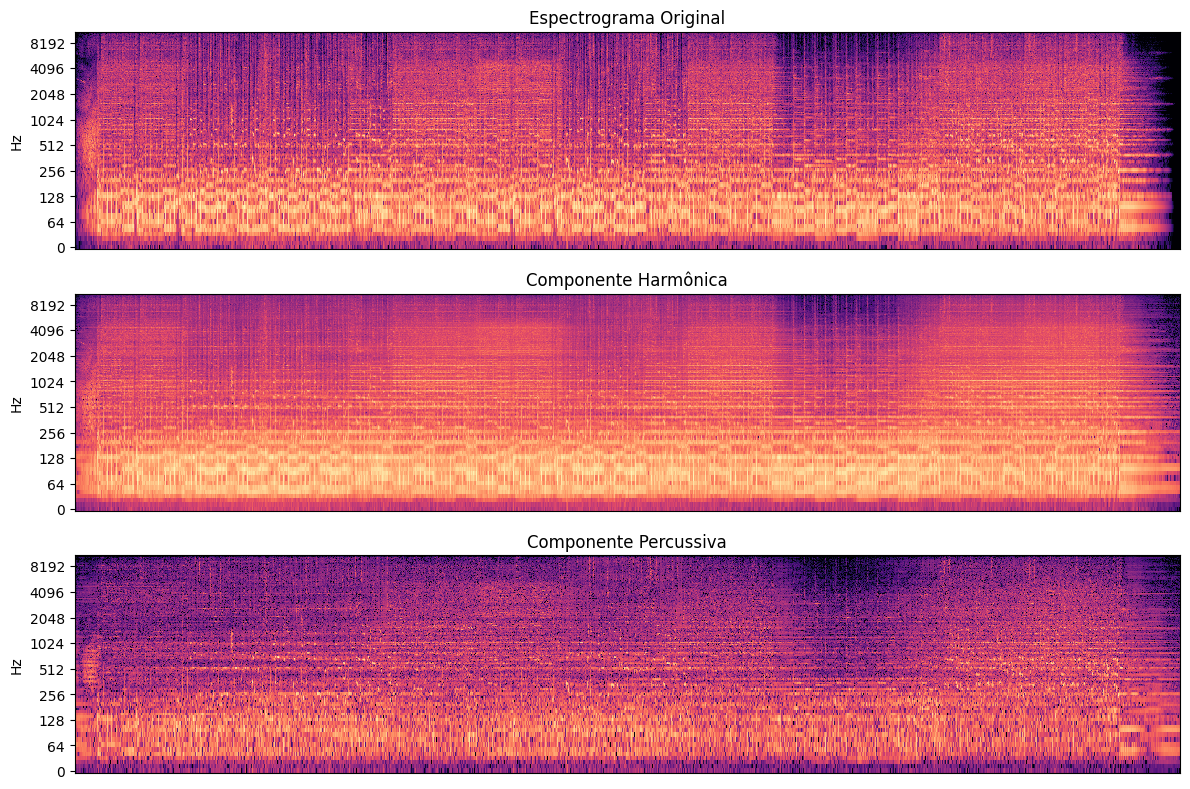

In [20]:
# Separação Harmônica e Percussiva
harmonic, percussive = librosa.effects.hpss(S)

# Visualizando Harmônica e Percussiva
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log')
plt.title('Espectrograma Original')

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(harmonic, ref=np.max), y_axis='log')
plt.title('Componente Harmônica')

plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(percussive, ref=np.max), y_axis='log')
plt.title('Componente Percussiva')

plt.tight_layout()
plt.show()

Esse código primeiro aplica a função HPSS sobre o espectrograma calculado do áudio, separando-o em componentes harmônicos e percussivos, depois os visualiza. Essa separação é útil para aplicações como análise rítmica ou melódica.

### 3. Filtragem por Agregação de Vizinhos Mais Próximos (`nn_filter`)

Por fim, vejamos como suavizar um espectrograma filtrando-o com um filtro de vizinhos mais próximos


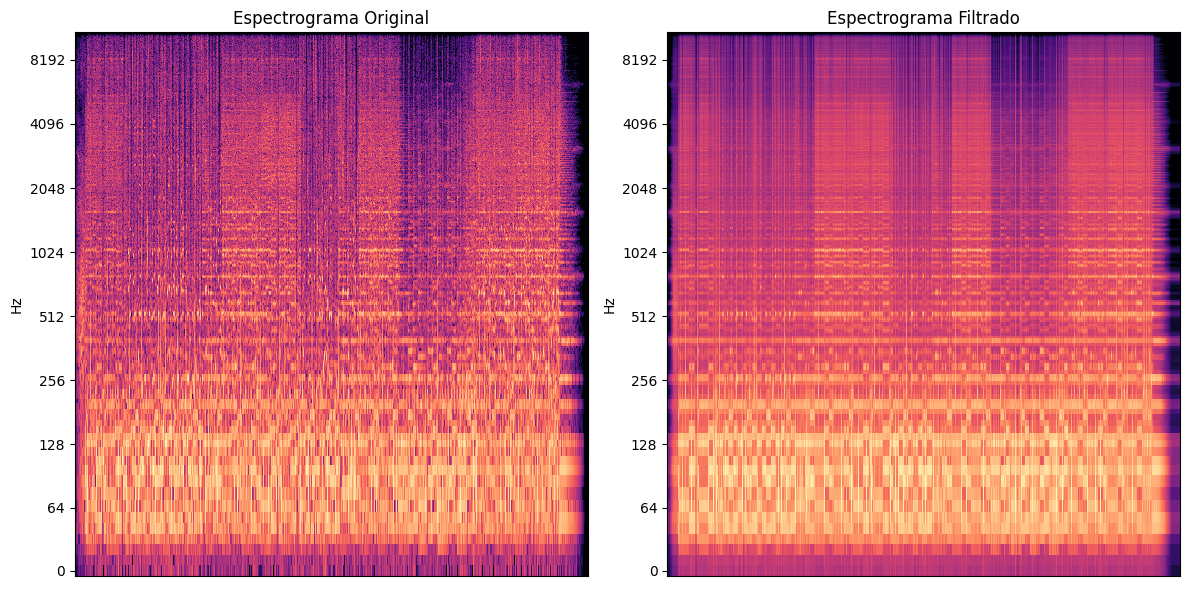

In [21]:
# Filtragem NN
filtered_S = librosa.decompose.nn_filter(S, aggregate=np.median, axis=1)

# Comparando o Original com o Filtrado
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', sr=sr)
plt.title('Espectrograma Original')

plt.subplot(1, 2, 2)
librosa.display.specshow(librosa.amplitude_to_db(filtered_S, ref=np.max), y_axis='log', sr=sr)
plt.title('Espectrograma Filtrado')

plt.tight_layout()
plt.show()

Este exemplo utiliza a função `nn_filter` para aplicar uma filtragem de mediana sobre o espectrograma no eixo da frequência (`axis=1`). O resultado é um espectrograma suavizado, onde ruídos e variações pequenas podem ser reduzidos, facilitando a identificação de padrões mais consistentes no espectrograma.